In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('E_D_NoisySet')
df=df.drop(df.columns[[0 , -1 , -2]] , 1)

In [4]:
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_Hamming'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            Hamming_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                Hd = jellyfish.hamming_distance(s1 , s2)
                print("Hamming Distance :" , Hd)
                if Hd < Hamming_best:
                    Hamming_best = Hd
                    best_match = s2
                df[col+'_Hamming'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("Hamming_best: " , Hamming_best)        
            print("*******")       

0.1_TypoD
row:  0
s1:  ZJanuary
s2:  January
Hamming Distance : 8


s1:  ZJanuary
s2:  April
Hamming Distance : 8


s1:  ZJanuary
s2:  June
Hamming Distance : 8


s1:  ZJanuary
s2:  August
Hamming Distance : 8


s1:  ZJanuary
s2:  September
Hamming Distance : 9


s1:  ZJanuary
s2:  November
Hamming Distance : 8


Best Match:  January
Hamming_best:  8
*******
row:  1
s1:  Augus
s2:  January
Hamming Distance : 6


s1:  Augus
s2:  April
Hamming Distance : 4


s1:  Augus
s2:  June
Hamming Distance : 4


s1:  Augus
s2:  August
Hamming Distance : 1


s1:  Augus
s2:  September
Hamming Distance : 9


s1:  Augus
s2:  November
Hamming Distance : 8


Best Match:  August
Hamming_best:  1
*******
row:  2
s1:  Janury
s2:  January
Hamming Distance : 3


s1:  Janury
s2:  April
Hamming Distance : 6


s1:  Janury
s2:  June
Hamming Distance : 4


s1:  Janury
s2:  August
Hamming Distance : 5


s1:  Janury
s2:  September
Hamming Distance : 9


s1:  Janury
s2:  November
Hamming Distance : 8


Best Match:  J

In [5]:
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
HammingAccuracy = []
for x in NameOfColumns:
    if "Hamming" in x:
        print("Hamming Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        HammingAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(HammingAccuracy)

Hamming Accuracy :  0.866666666667
Hamming Accuracy :  0.775
Hamming Accuracy :  0.6
Hamming Accuracy :  0.575
Hamming Accuracy :  0.583333333333
Hamming Accuracy :  0.625
Hamming Accuracy :  0.55
Hamming Accuracy :  0.433333333333
[0.8666666666666667, 0.77500000000000002, 0.59999999999999998, 0.57499999999999996, 0.58333333333333337, 0.625, 0.55000000000000004, 0.43333333333333335]


In [6]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 , 0.8]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoD_Hamming'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoD_Hamming'].iat[x]
diff   

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7,Transformation_0.8
0,January,,April,,September,,,,June
1,August,,,January,April,June,April,January,
2,January,,,,September,,,,
3,November,,September,,September,,June,September,
4,April,,,,,,,June,
5,April,June,,,January,,,January,
6,June,,,,,April,,,
7,November,,,September,,April,,June,
8,January,,,June,,,,June,June
9,August,,,April,June,January,June,,April


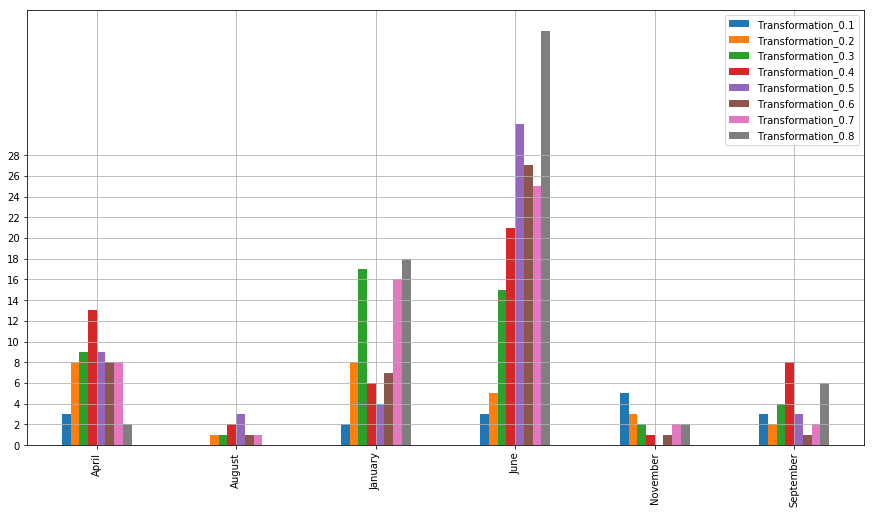

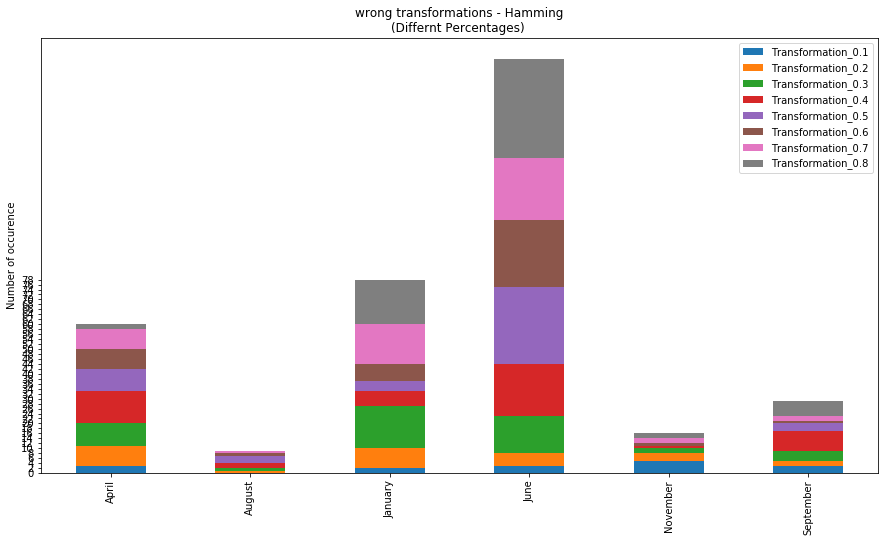

In [7]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 30 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 80 ,2))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Differnt Percentages) ')
plt.show()

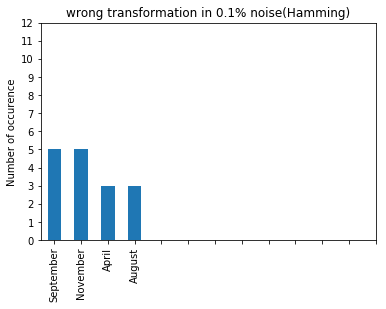

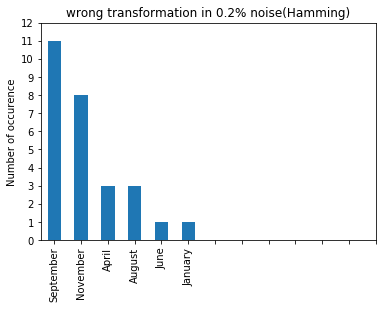

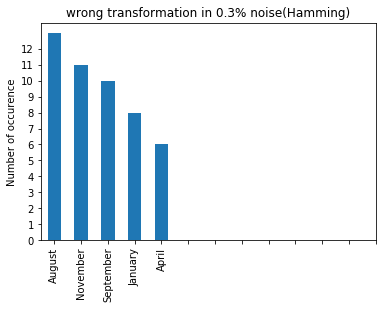

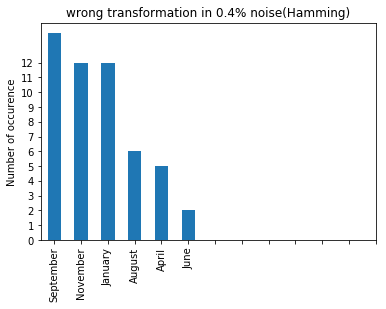

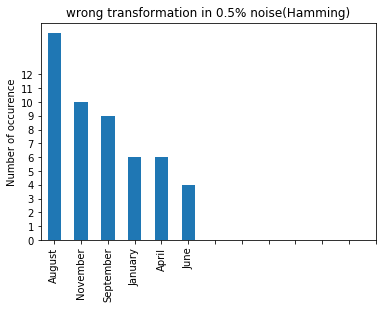

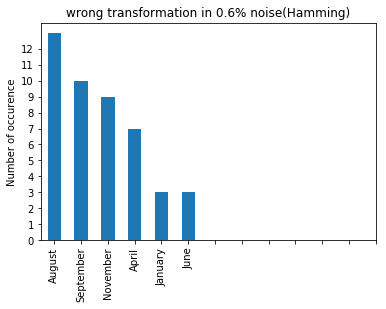

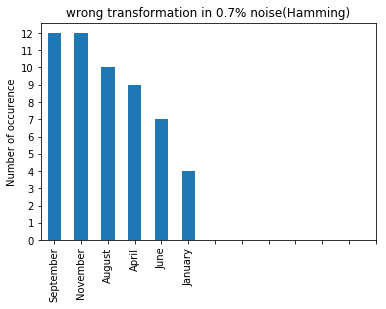

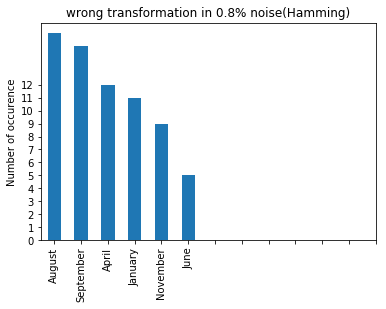

In [8]:
import numpy as np

#Iterate ove the transformed columns 
for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoD_Hamming'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoD'] = ''
    for x in np.nditer(c):
        x = int(x)
        diff['Original'].iat[x] = df['STD_Months'].iat[x]
        diff[str(p) + '_TypoD'].iat[x] = df[str(p) + '_TypoD'].iat[x]
        diff['Transformation'].iat[x] = df[str(p) + '_TypoD_Hamming'].iat[x]
    diff.dropna()
    wrongTransform = diff['Original'].value_counts()
    wrongTransform.plot.bar()
    plt.yticks(range(0 , 13))
    plt.ylabel('Number of occurence')
    plt.title('wrong transformation in {}% noise(Hamming)'.format(p))
    plt.xticks(range(0,13))
    plt.show() 